In [2]:
!pip3 install xgboost

     |████████████████████████████████| 1.2 MB 7.2 MB/s 
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
!pip3 install keras

     |████████████████████████████████| 3.0 MB 12.8 MB/s 
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [6]:
!pip3 install tensorflow

     |████████████████████████████████| 195.7 MB 14.8 MB/s 
     |████████████████████████████████| 57 kB 16.7 MB/s 
     |████████████████████████████████| 42 kB 4.9 MB/s 
     |████████████████████████████████| 3.7 MB 15.9 MB/s 
     |████████████████████████████████| 65 kB 10.5 MB/s 
     |████████████████████████████████| 462 kB 38.3 MB/s 
     |████████████████████████████████| 6.0 MB 23.7 MB/s 
     |████████████████████████████████| 2.9 MB 9.7 MB/s 
     |████████████████████████████████| 1.2 MB 50.7 MB/s 
     |████████████████████████████████| 132 kB 38.4 MB/s 
     |████████████████████████████████| 147 kB 46.4 MB/s 
     |████████████████████████████████| 3.5 MB 8.8 MB/s 
     |████████████████████████████████| 97 kB 16.1 MB/s 
     |████████████████████████████████| 781 kB 54.5 MB/s 
     |████████████████████████████████| 155 kB 54.3 MB/s 
     |████████████████████████████████| 77 kB 18.1 MB/s 
     |████████████████████████████████| 146 kB 38.8 MB/s 
  Created wheel for 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import datetime as dt
import calendar,warnings,itertools,matplotlib,keras,shutil
import tensorflow as tf
import statsmodels.api as sm
from datetime import datetime
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.datasets import load_iris,make_regression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from keras import Sequential
from keras.layers import Dense
from IPython.core import display as ICD
#from tensorflow_core.estimator import inputs

#Hiding the warnings
warnings.filterwarnings('ignore') 

In [10]:
data = pd.read_csv("/Users/yangn/Desktop/CIND 820/01 - Predictive Analytics_SC_Data Analytics/DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS/DataCoSupplyChainDataset.csv")

# Success - Display the first record
display(data.head(n=10))

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class
5,TRANSFER,6,4,18.580000,294.980011,Shipping canceled,0,73,Sporting Goods,Tonawanda,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/19/2018 11:03,Standard Class
6,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:42,First Class
7,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,Miami,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 10:21,First Class
8,CASH,3,2,133.720001,278.589996,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 10:00,Second Class
9,CASH,2,1,132.149994,275.309998,Late delivery,1,73,Sporting Goods,San Ramon,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 9:39,First Class


In [12]:
data.shape

(180519, 53)

In [11]:
data.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


#### The data consists of some missing values from Customer Lname, Product Description, Order Zipcode and, Customer Zipcode which should be removed or replaced before proceeding with the analysis. And also, since there is a chance different customers might have the same first name or same last name a new column with ‘customer full name’ is created to avoid any ambiguities.

In [14]:
# Adding first name and last name together to create new column
data['Customer Full Name'] = data['Customer Fname'].astype(str)+data['Customer Lname'].astype(str)

In [16]:
# To make it easier for analysis some unimportant columns are dropped
data=data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
data.shape

(180519, 42)

#### There are 3 missing values in Customer Zipcode column. Since the missing values are just zip codes which are not very important these are replaced with zero before proceeding with data analysis.

In [17]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)#Filling NaN columns with zero

# Data Visualization

<AxesSubplot:>

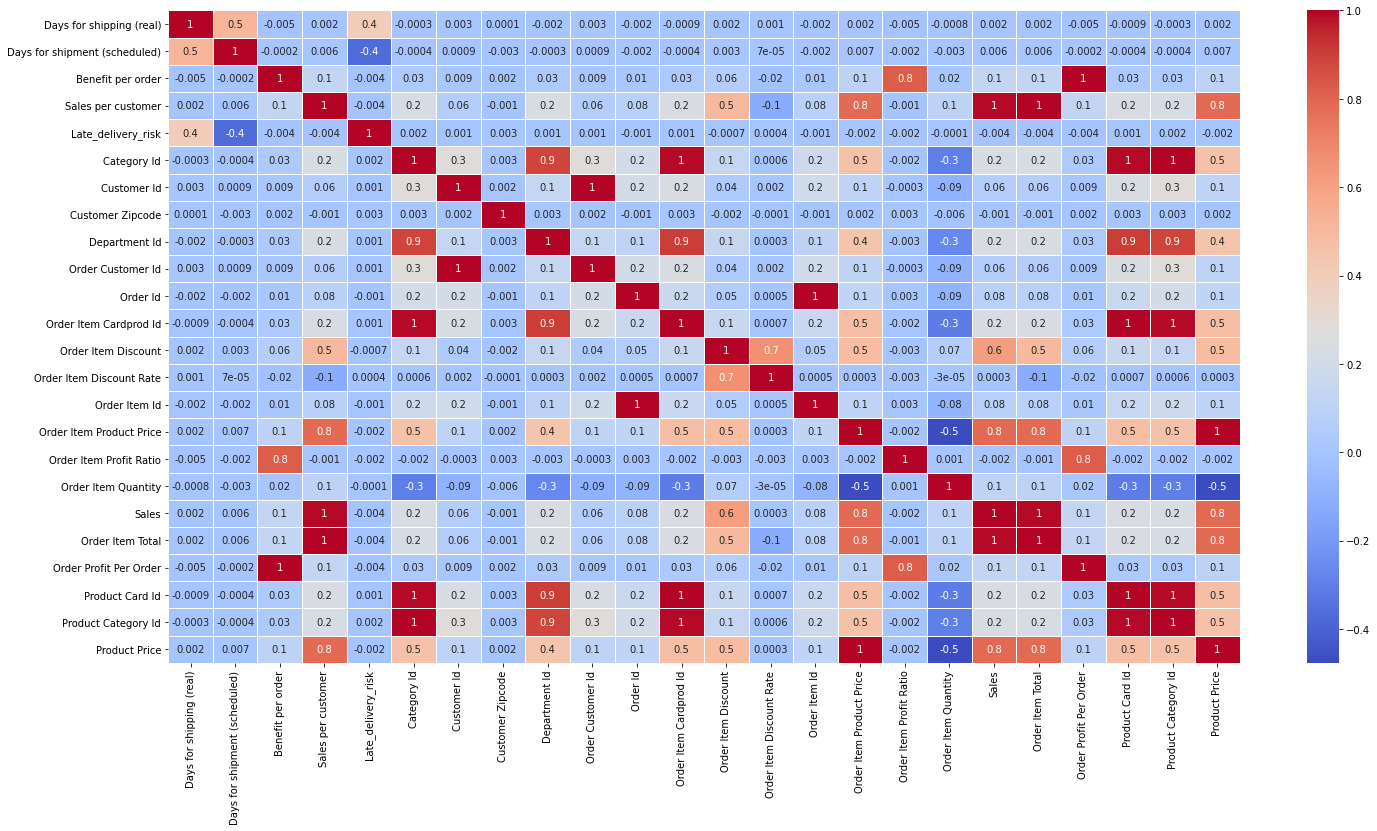

In [18]:
# To find important parameters, data correlation is performed.
fig, ax = plt.subplots(figsize=(24,12))         # figsize
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm') # Heatmap for correlation matrix

### As the data which is being used for analysis is related to Supply chain, it makes sense to find which region has most sales? It can be found by using groupby method which will segregate similar market regions together and add all sales for that particular region using 'sum' function.

<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

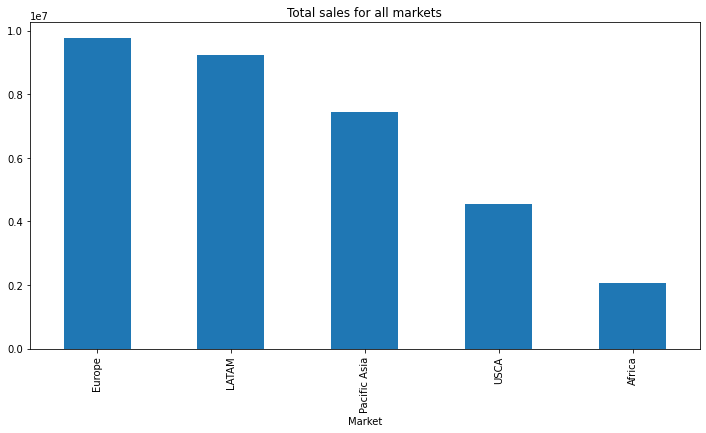

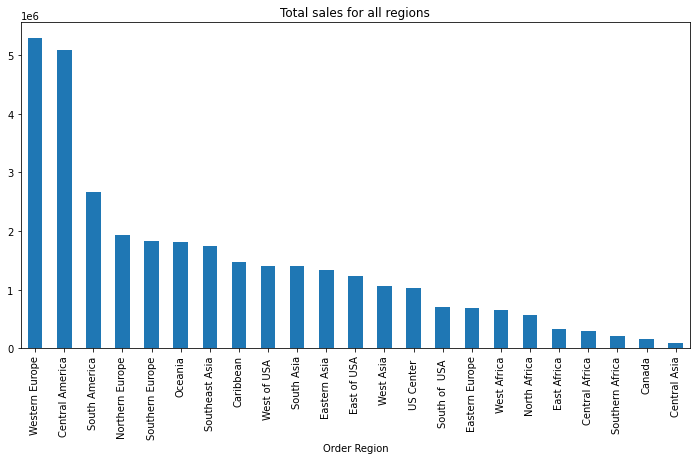

In [20]:
market = data.groupby('Market') #Grouping by market
region = data.groupby('Order Region') #Grouping by order region

plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

In [ ]:
### Above showing West EU and Central America top the sales from global market, USCA and Africa are the bottom 2 markets. Now let's deep dive into department and category sales

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

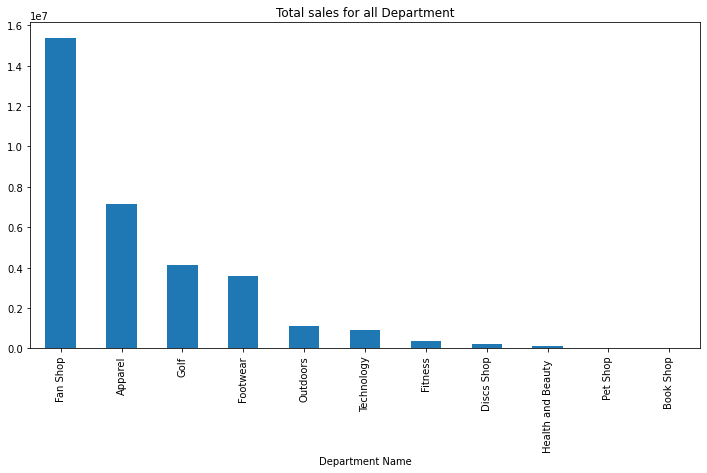

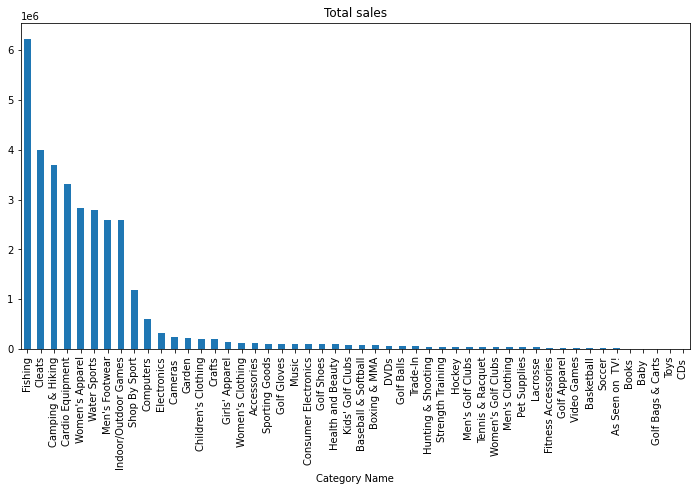

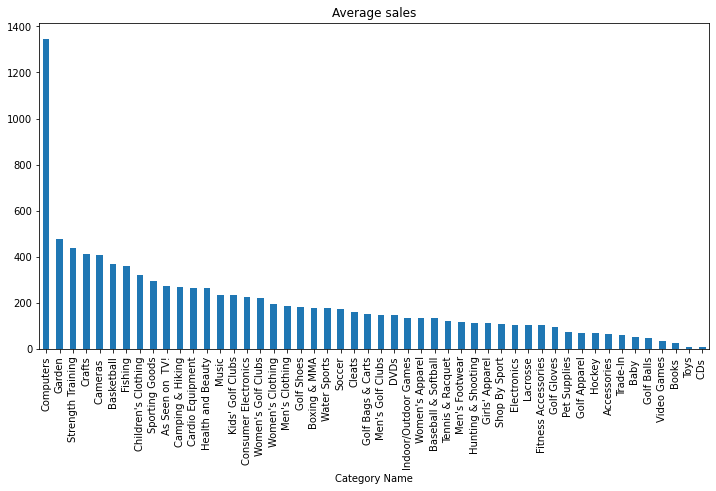

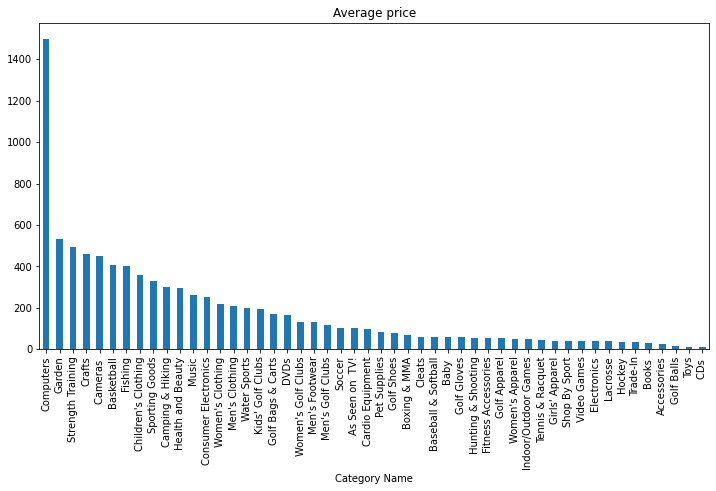

In [24]:
department = data.groupby('Department Name') #Grouping by department name 
plt.figure(1)
department['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all Department")
categories = data.groupby('Category Name') #Grouping all categories
plt.figure(2)
# Total sum of sales for all categories
categories['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales")
# Mean sales for all categories
plt.figure(3)
categories['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(4)
# Mean prices for all categories
categories['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

In [30]:
data.groupby('Market')['Sales per customer'].describe()

,count,mean,std,min,25%,50%,75%,max
Market,,,,,,,,
Africa,11614.0,177.516738,102.335271,7.49,103.989998,159.990005,240.000000,499.950012
Europe,50252.0,194.404169,145.883419,8.47,107.889999,167.990005,254.979996,1939.989990
LATAM,51594.0,179.008452,100.766670,7.49,106.589996,163.979996,244.899994,499.950012
Pacific Asia,41260.0,180.180869,121.976372,7.49,97.959999,163.770004,246.149994,1500.000000
USCA,25799.0,176.499086,101.052421,9.09,103.989998,159.990005,240.000000,499.950012


In [31]:
data.groupby('Department Name')['Sales per customer'].describe()

,count,mean,std,min,25%,50%,75%,max
Department Name,,,,,,,,
Apparel,48998.0,146.284628,69.122144,44.310001,107.980003,122.839996,176.970001,461.480011
Book Shop,405.0,27.909679,2.182455,23.309999,26.110001,27.969999,29.840000,31.080000
Discs Shop,2026.0,101.518213,85.466445,8.470000,33.790001,38.959999,161.089996,260.649994
Fan Shop,66861.0,230.008252,99.745078,8.660000,165.990005,219.910004,299.989990,495.000000
Fitness,2479.0,144.073522,111.035487,16.500000,61.130001,109.959999,224.955002,989.989990
Footwear,14525.0,247.811968,143.888300,20.990000,105.800003,245.979996,371.959992,1939.989990
Golf,33220.0,124.686964,62.747192,18.750000,74.379997,123.000000,175.960007,350.000000
Health and Beauty,362.0,263.420194,20.694545,219.779999,246.149994,266.670013,281.320007,293.040008
Outdoors,9686.0,116.245451,113.224490,7.490000,44.189999,79.970001,135.960007,593.989990


In [25]:
from statsmodels.distributions.empirical_distribution import ECDF

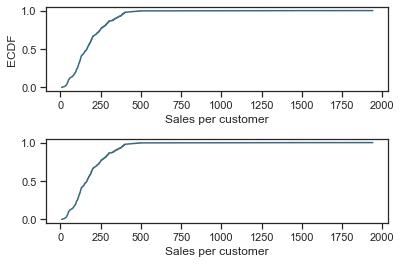

In [29]:
sns.set(style = "ticks")
c = '#386B7F' 
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.tight_layout(pad=2.0)
plt.subplot(211)
cdf = ECDF(data['Sales per customer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales per customer'); plt.ylabel('ECDF');

plt.subplot(212)
cdf = ECDF(data['Sales per customer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales per customer');

### From above, it's oberseved that most of sales per customer is below 400 dollars and 80 percent of the sales per customer is in the range of 0-250 dollars

In [35]:
data['order_year']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_week_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

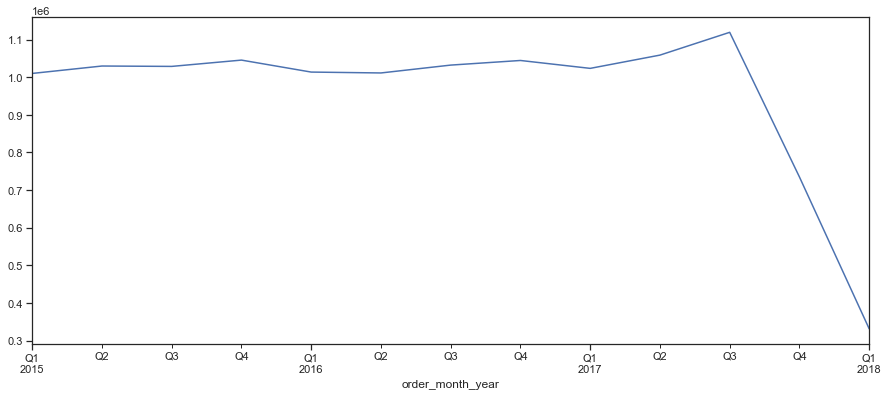

In [36]:
quarter= data.groupby('order_month_year')
quartersales=quarter['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

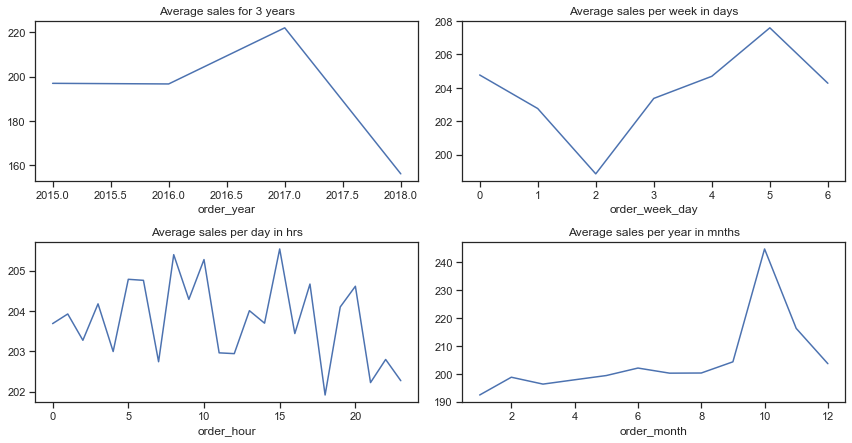

In [37]:
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quater= data.groupby('order_year')
quater['Sales'].mean().plot(figsize=(12,12),title='Average sales for 3 years')
plt.subplot(4, 2, 2)
days=data.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average sales per week in days')
plt.subplot(4, 2, 3)
hrs=data.groupby("order_hour")
hrs['Sales'].mean().plot(figsize=(12,12),title='Average sales per day in hrs')
plt.subplot(4, 2, 4)
mnth=data.groupby("order_month")
mnth['Sales'].mean().plot(figsize=(12,12),title='Average sales per year in mnths')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Top 10 products with most late deliveries'}>

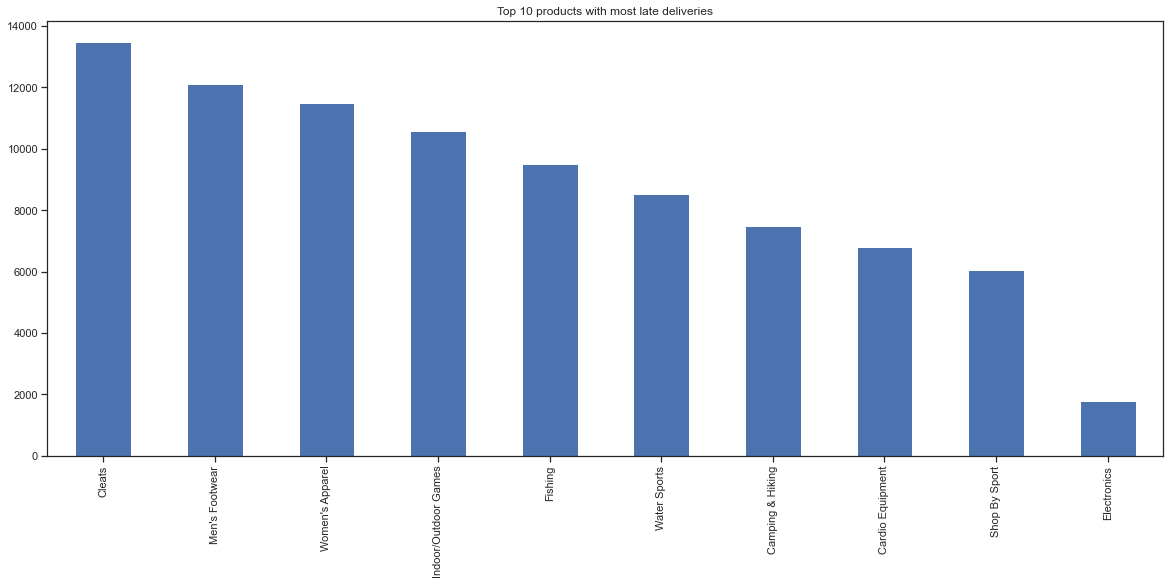

In [38]:
#Filtering columns with late delivery status
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

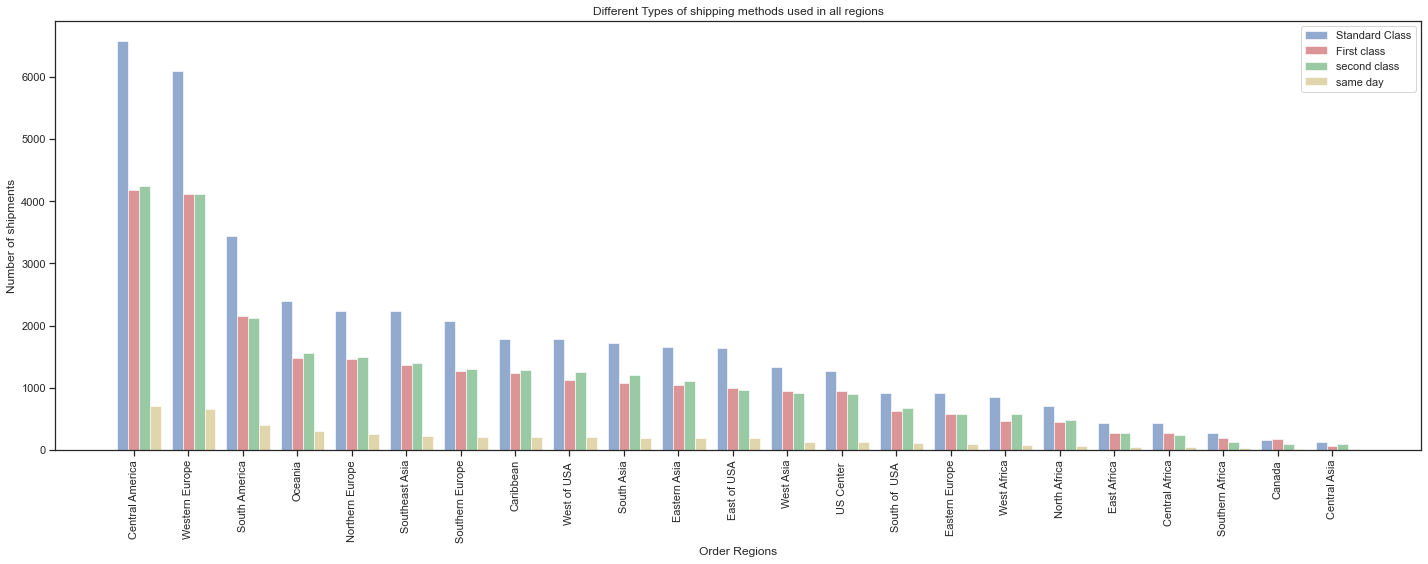

In [39]:
#Filtering late delivery orders with standard class shipping
xyz1 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Standard Class')]
#Filtering late delivery orders with first class shipping
xyz2 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'First Class')]
#Filtering late delivery orders with second class shipping
xyz3 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Second Class')]
#Filtering late delivery orders with same day shipping
xyz4 = data[(data['Delivery Status'] == 'Late delivery') & (data['Shipping Mode'] == 'Same Day')]
#Counting total values
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()
count3=xyz3['Order Region'].value_counts()
count4=xyz4['Order Region'].value_counts()
#Index names
names=data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8))
index=np.arange(n_groups)
bar_width=0.2
opacity=0.6
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='b',label='Standard Class')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='r',label='First class')
type3=plt.bar(index+bar_width+bar_width,count3,bar_width,alpha=opacity,color='g',label='second class')
type4=plt.bar(index+bar_width+bar_width+bar_width,count4,bar_width,alpha=opacity,color='y',label='same day')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Different Types of shipping methods used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

### As expected the most number of late deliveries for all regions occured with standard class shipping,with same day shipping being the one with least number of late deliveries.Both the first class and second class shipping have almost equal number of late deliveries.

In [40]:
#panda profiling for EDA to understand variables, correaltion and basic statistic summary
import sys
!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [41]:
#Profiling the sales orders with complete and closed status only 
profile = ProfileReport(data, title = 'EDA profile')
profile.to_file(output_file="profile_report.html") 

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.64it/s]


# Data Preprocessing for machine learning modelling and prediction 

In [50]:
# Convert date object to datetime data format, and convert categorical to numeric label
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data[['Type','Delivery Status','Category Name','Order Region','Department Name','Market','Shipping Mode','Order Status']] = data[['Type','Delivery Status','Category Name','Order Region','Department Name','Market','Shipping Mode','Order Status']].astype('category')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  category      
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  category      
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  category      
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [52]:
df = data.drop(data.columns[[1,2,3,7,9,10,11,12,13,14,15,18,19,20,22,23,24,27,28,29,32,34,36,37,38,41]],axis = 1)

In [53]:
df.to_csv('sales_analysis.csv', index=False)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Type                      180519 non-null  category      
 1   Sales per customer        180519 non-null  float64       
 2   Delivery Status           180519 non-null  category      
 3   Late_delivery_risk        180519 non-null  int64         
 4   Category Name             180519 non-null  category      
 5   Department Name           180519 non-null  category      
 6   Market                    180519 non-null  category      
 7   order date (DateOrders)   180519 non-null  datetime64[ns]
 8   Order Item Discount Rate  180519 non-null  float64       
 9   Order Item Id             180519 non-null  int64         
 10  Sales                     180519 non-null  float64       
 11  Order Item Total          180519 non-null  float64       
 12  Or

In [55]:
df.shape

(180519, 21)